In [392]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LinearRegression

$X: x \in \mathbb{R}\\$
$p_x = U(0, 20)\\$
$Y: y \in \mathbb{R}\\$
$y = f(x) + \epsilon\\$
$p_\epsilon = \mathcal{N}(0,\sigma) \\$
$p_y = \mathcal{N}(f(x),\sigma)$

$\mathcal{D}_N = {x_i, y_i}, i =1, ..., N\\$
$f(x, a, b) = ax + b\\$
$a_{max}, b_{max} = \text{argmax}(\prod_{i=1}^N p_y(x, a, b)) \\$
$\sigma \approx \sqrt{\sum_{i=1}^N(y_i - f(x_i, a_{max}, b_{max}))^2} \\$

$g(x, a, b) = ax + b + 0.5 x^2$

Text(0, 0.5, 'y')

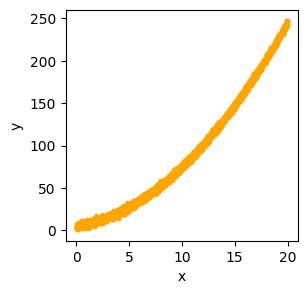

In [393]:
def linear_model(x, a:float = 1, b:float = 0):
    return a*x + b

def actual_model(x, a:float = 1, b:float = 0):
    return a*x + b + 0.5*x**2

ntrain = 10000
s = 2
a_f = 2
b_f = 5
rng = np.random.default_rng()
x = rng.uniform(0, 20, ntrain)
x_large = rng.uniform(0, 20, 10000)
f = linear_model(x, a_f, b_f)
g = actual_model(x, a_f, b_f)
g_large = actual_model(x_large, a_f, b_f)
 
y = rng.normal(g, s, ntrain)
y_large = rng.normal(g_large, s)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.scatter(x, y, s=3, c="orange")
ax.set_xlabel("x")
ax.set_ylabel("y")

Estimated f(x): [[12.04204477]]*x + [-28.79861709]


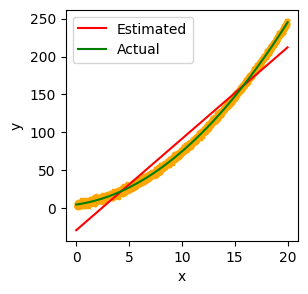

In [394]:
reg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
a_reg = reg.coef_
b_reg = reg.intercept_
print(f"Estimated f(x): {a_reg}*x + {b_reg}")

x_test = np.linspace(0, 20, 100)
y_test = linear_model(x_test, a_reg, b_reg)[0]
g_test = actual_model(x_test, a_f, b_f)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.plot(x_test, y_test, color="red", label="Estimated")
ax.plot(x_test, g_test, color="green", label="Actual")
ax.scatter(x, y, s=3, c="orange")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

15.03015163638206


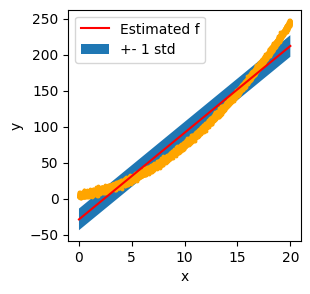

In [395]:
# Gaussian model for parameters
s_est = np.sqrt(np.mean((y - linear_model(x, a_reg, b_reg)[0])**2))
print(s_est)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.plot(x_test, y_test, color="red", label="Estimated f")
ax.fill_between(x_test, y_test-s_est, y_test+s_est, label=r"+- 1 std")
ax.scatter(x, y, s=3, c="orange")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

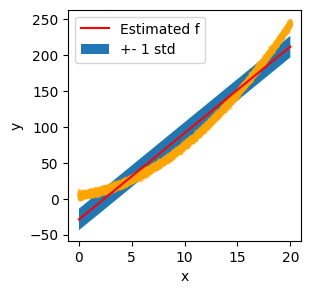

In [396]:

y_est_large = linear_model(x_large, a_reg, b_reg)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.plot(x_test, y_test, color="red", label=r"Estimated f")
ax.fill_between(x_test, y_test-s_est, y_test+s_est, label=r"+- 1 std")
ax.scatter(x_large, y_large, s=3, alpha=0.5, c="orange")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

Text(0.5, 0.98, 'Fraction inside interval: 63.36000000000001 %')

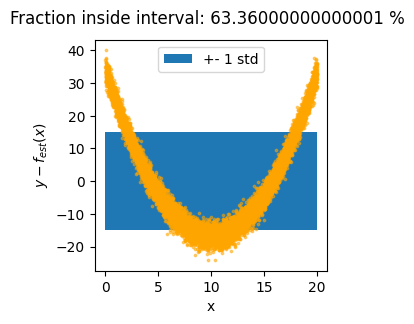

In [397]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.fill_between(x_test, -s_est, s_est, label=r"+- 1 std")
ax.scatter(x_large, y_large - y_est_large, s=3, alpha=0.5, c="orange")
ax.set_xlabel("x")
ax.set_ylabel(r"$y-f_{est}(x)$")
ax.legend()
frac_inside = np.mean(np.where(np.abs(y_large - y_est_large) <= s_est, 1, 0 ))
fig.suptitle(f"Fraction inside interval: {frac_inside*100} %")